># Universidad Autónoma de Aguascalientes
>## *Ingeniería en Computación Inteligente*
>#### Materia:
>Inteligencia Artificial
>#### Topico: 
>Análisis de Componentes Principales
>#### Integrantes del Equipo:
>- Juan Francisco Gallo Ramírez
>- José Alfredo Díaz Robledo
>- Luis Palbo Esparza Terrones
>- Luis Manuel Flores Jiménez 
>#### Maestro: 
>Dr. Francisco Javier Luna Rosas
>#### Fecha: 
>Octubre del 2023

# <<< ACP con Web Mining >>>

- Se importan la librerías correspondientes.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import continents as cg
import re

- Dirección de la fuente de información.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_World_Heritage_in_Danger'
response = requests.get(url)

- Se filtran los datos útiles, y se limpian de caracteres inválidos.

In [3]:
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    tabla = soup.find('table', class_ = 'wikitable plainrowheaders sortable')
    
    # Se obtinenen las líneas de información.
    tabla_data = []
    for fila in tabla.find_all('tr'):
        fila_data = [celda.get_text(strip=True) for celda in fila.find_all(['td', 'th'])]
        tabla_data.append(fila_data)

    df = pd.DataFrame(tabla_data[1:], columns=tabla_data[0])
    df.set_index(tabla_data[0][0], inplace=True)
    
    # Se eliminan las columnas no útiles.
    col_eliminar = ["Image", "Criteria", "Reason", "Refs"]
    df.drop(col_eliminar, axis=1, inplace=True)
    
    for i in range(len(df)):
        # Se limpian las celdas de área.
        part = df.at[df.index[i], "Areaha (acre)"].split()
        df.at[df.index[i], "Areaha (acre)"] = float(part[0].replace(",", "").replace("—", "0"))
        
        # Se limpian las celdas de año cuando se consideró en daño.
        part = df.at[df.index[i], "Endangered"].split('–')
        df.at[df.index[i], "Endangered"] = part[0]
        
        # Se obtienen las líneas de la ubicación para sola deja el país.
        part = df.at[df.index[i], "Location"].split(',')
        part = re.split(r'\d+', part[len(part) - 1])
        
        # Se obtiene el continente del país.
        df.at[df.index[i], "Location"] = cg.get_continent_by_country_name(part[0])
        
    print(df)
    
        # Se convierte el continente en un número.
    for i in range(len(df)):
        elem = df.at[df.index[i], "Location"]
        if elem == "África":
            df.at[df.index[i], "Location"] = 1
        elif elem == "América del Norte":
            df.at[df.index[i], "Location"] = 2
        elif elem == "América del Sur":
            df.at[df.index[i], "Location"] = 3
        elif elem == "Asia":
            df.at[df.index[i], "Location"] = 4
        elif elem == "Europa":
            df.at[df.index[i], "Location"] = 5
        elif elem == "Oceanía":
            df.at[df.index[i], "Location"] = 6
        elif elem == "Desconocido":
            df.at[df.index[i], "Location"] = 7
    print(df)
else:
    print(">> La solicitud a la página web falló. Código de error: ", response.status_code)


                                                             Location  \
Name                                                                    
Abu Mena                                                       África   
Air and Ténéré Natural Reserves                                África   
Ancient City of Aleppo                                           Asia   
Ancient City of Bosra                                            Asia   
Ancient City of Damascus                                         Asia   
Ancient Villages of Northern Syria                               Asia   
Archaeological Site of Cyrene                                  África   
Archaeological Site of Leptis Magna                            África   
Archaeological Site of Sabratha                                África   
Ashur(Qal'at Sherqat)                                            Asia   
Chan Chan Archaeological Zone                         América del Sur   
City of Potosí                                     

- Se llama a la funciíon para hacer el Análisis de Componentes Principales.

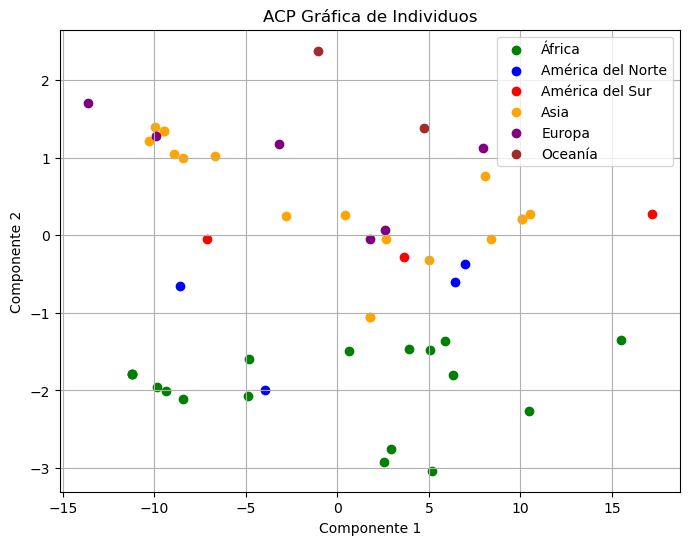

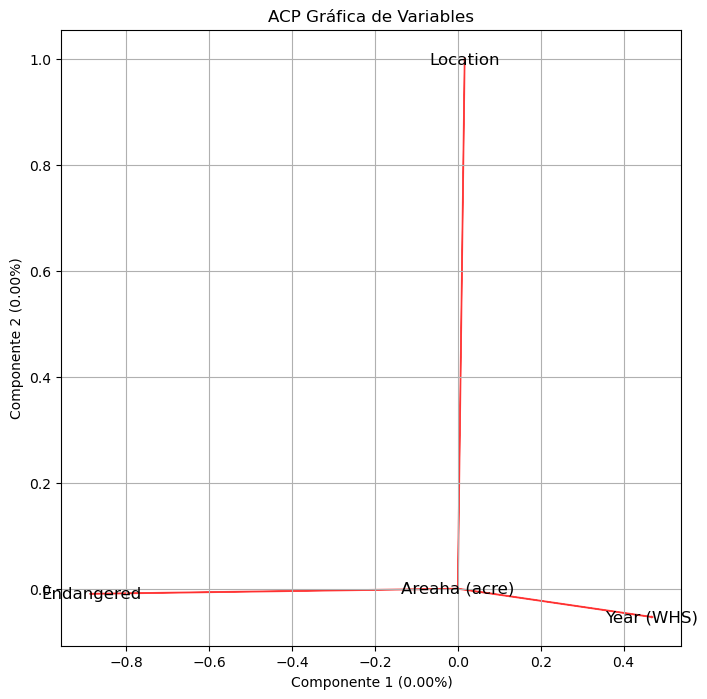

In [4]:
pca = PCA(n_components=4)  # Define el número de componentes principales
datos_pca = pca.fit_transform(df)

colores = {
    1: "green",
    2: "blue",
    3: "red",
    4: "orange",
    5: "purple",
    6: "brown",
}
# Gráfico de los individuos en el plano PC1 vs PC2
plt.figure(figsize=(8, 6))

for continente, color in colores.items():
    if continente == 1:
        cont = "África"
    elif continente == 2:
        cont = "América del Norte"
    elif continente == 3:
        cont = "América del Sur"
    elif continente == 4:
        cont = "Asia"
    elif continente == 5:
        cont = "Europa"
    elif continente == 6:
        cont = "Oceanía"
        
    subset = datos_pca[df["Location"] == continente]
    plt.scatter(subset[:, 2], subset[:, 3], color=color, label=cont)
    
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid()
plt.title('ACP Gráfica de Individuos')
plt.show()

# Gráfico de círculo de correlaciones
componentes_principales = pca.components_
varianza_explicada = pca.explained_variance_ratio_

plt.figure(figsize=(8, 8))
for i, (var, pc1, pc2) in enumerate(zip(df.columns, componentes_principales[2], componentes_principales[3])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.7)
    plt.text(pc1, pc2, var, fontsize=12, ha='center', va='center')

plt.xlabel(f'Componente 1 ({varianza_explicada[2]*100:.2f}%)')
plt.ylabel(f'Componente 2 ({varianza_explicada[3]*100:.2f}%)')
plt.grid()
plt.title('ACP Gráfica de Variables')
plt.show()
